In [1]:
import numpy as np                    # Linear Algebra
import pandas as pd                   # Data processing 
import matplotlib.pyplot as plt       # Visualizations
import seaborn as sns                 # Visualizations

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix 

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df=pd.read_csv('/kaggle/input/advertisement-click-on-ad/advertising.csv')

In [5]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
df.duplicated().sum() 

0

In [8]:
df.columns # displays column names

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [9]:
df.select_dtypes(include = ['object']).columns # Displays categorical variables which are detected by python 

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [10]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [11]:
# Assigning columns as numerical variables
numeric_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage' ]

In [12]:
#Assigning columns as categorical variables
Categorical_cols = [ 'Ad Topic Line', 'City', 'Male', 'Country', 'Clicked on Ad' ]

In [13]:
df[numeric_cols].describe()
# Decribe method is used to give statistical information on the numerical colum

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


In [14]:
df[Categorical_cols].describe(include = ['O'])

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Cloned 5thgeneration orchestration,Lisamouth,France
freq,1,3,9


In [15]:
#As the mean and median(50% percentile) are very similar to each other which indicates that our data is not skewed and we do not require any data transformations.We shall confirm this by visualizing as well.

In [16]:
#Extracting Datetime Variables
#Utilizing timestamp feature to better understand the pattern when a user is clicking on a ad.

In [17]:
# Extract datetime variables using timestamp column
df['Timestamp'] = pd.to_datetime(df['Timestamp']) 
# Converting timestamp column into datatime object in order to extract new features
df['Month'] = df['Timestamp'].dt.month 
# Creates a new column called Month
df['Day'] = df['Timestamp'].dt.day     
# Creates a new column called Day
df['Hour'] = df['Timestamp'].dt.hour   
# Creates a new column called Hour
df["Weekday"] = df['Timestamp'].dt.dayofweek 
# Creates a new column called Weekday with sunday as 6 and monday as 0
# Other way to create a weekday column
#df['weekday'] = df['Timestamp'].apply(lambda x: x.weekday()) # Monday 0 .. sunday 6
# Dropping timestamp column to avoid redundancy
df = df.drop(['Timestamp'], axis=1) # deleting timestamp

In [18]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,1,2,11,21,3
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,1,4,22,2,4
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1,2,1,17,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,0,3,24,2,3


/tmp/ipykernel_32/1374469727.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Clicked on Ad"], bins = 20)


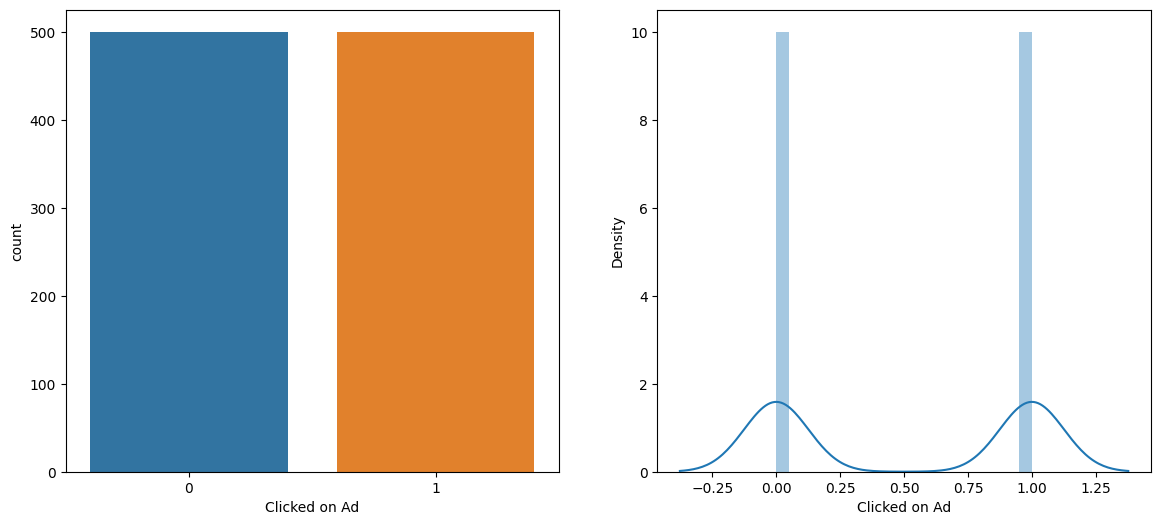

In [19]:
# Visualizing target variable Clicked on Ad
plt.figure(figsize = (14, 6)) 
plt.subplot(1,2,1)            
sns.countplot(x = 'Clicked on Ad', data = df)
plt.subplot(1,2,2)
sns.distplot(df["Clicked on Ad"], bins = 20)
plt.show()

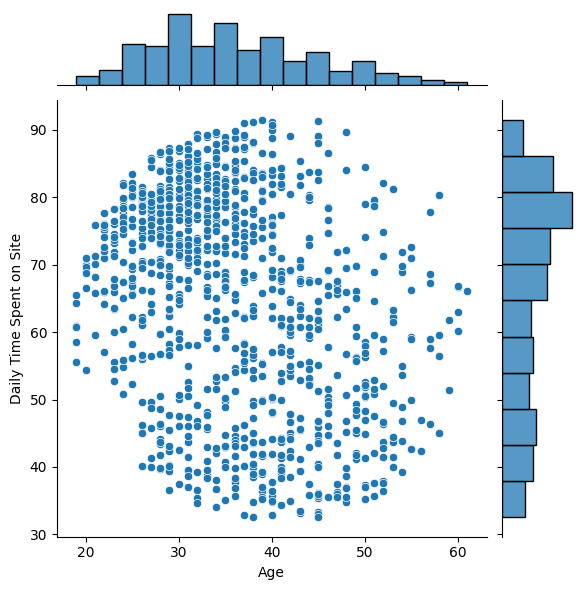

In [20]:
# Jointplot of daily time spent on site and age
sns.jointplot(x = "Age", y= "Daily Time Spent on Site", data = df) 

<Figure size 800x600 with 0 Axes>

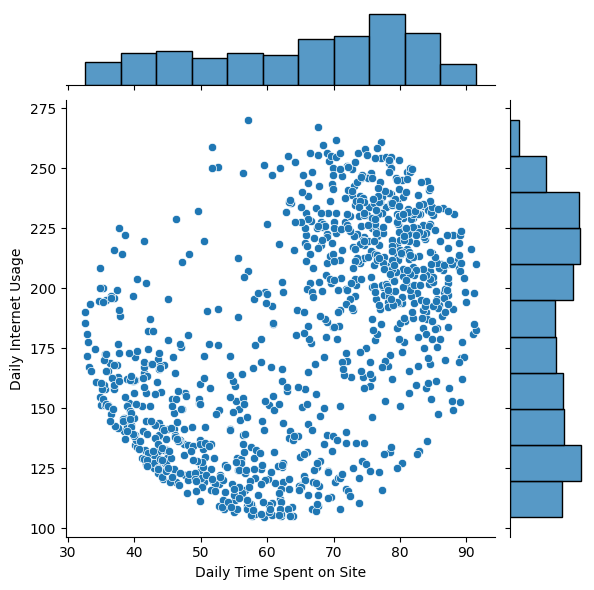

In [21]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=df["Daily Time Spent on Site"], y=df["Daily Internet Usage"])

In [22]:
# sns.pairplot(df, hue='Clicked on Ad')

In [23]:
print('oldest person was of:', df['Age'].max(), 'Years')
print('Youngest person was of:', df['Age'].min(), 'Years')
print('Average age was of:', df['Age'].mean(), 'Years')

oldest person was of: 61 Years
Youngest person was of: 19 Years
Average age was of: 36.009 Years


<Axes: >

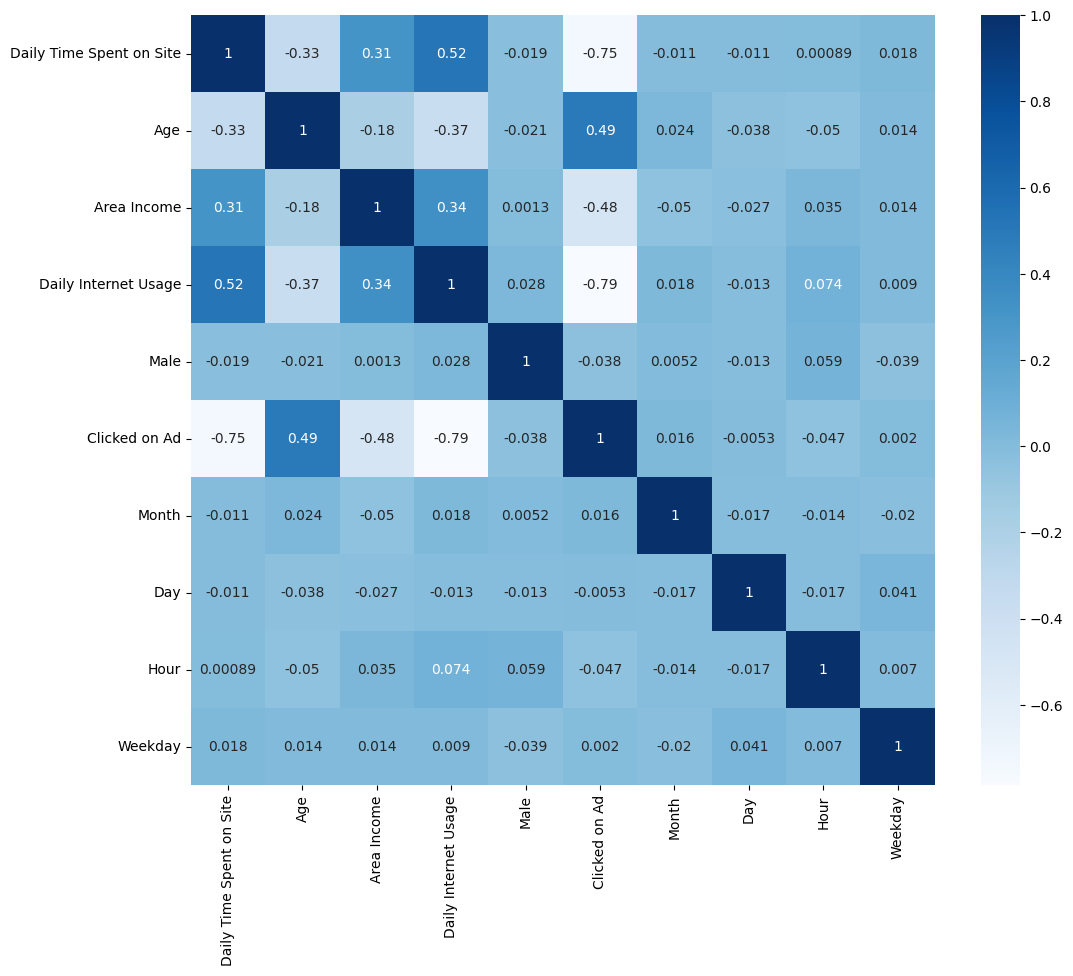

In [24]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap='Blues', annot = True) # Degree of relationship i.e correlation using heatmap

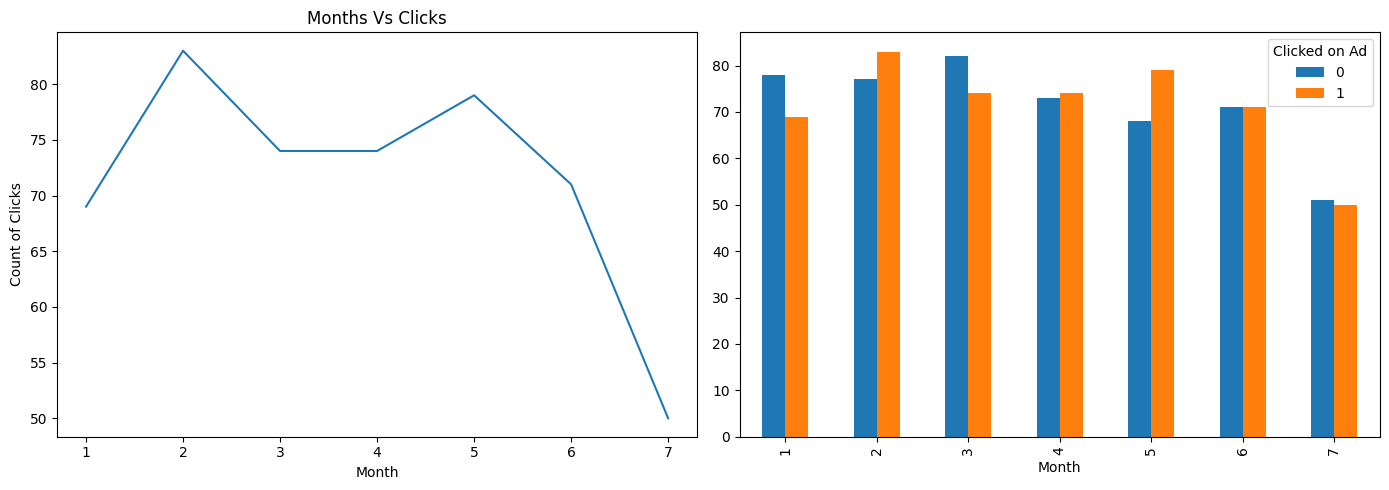

In [25]:
f,ax=plt.subplots(1,2,figsize=(14,5))
df['Month'][df['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_title('Months Vs Clicks')
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(df["Clicked on Ad"], df["Month"]).T.plot(kind = 'bar',ax=ax[1])
#df.groupby(['Month'])['Clicked on Ad'].sum() # alternative code
plt.tight_layout()
plt.show()

In [26]:
#Line chart showing the count of clicks for each month. Grouped bar chart shows distribution of target variable across 7 months. 2nd Month seems to be the best for clicking on a Ad.

<Figure size 1200x600 with 0 Axes>

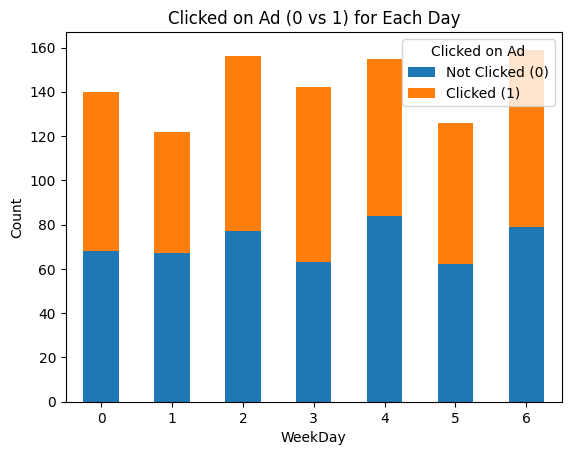

In [27]:
clicked_by_month = df.groupby(['Weekday', 'Clicked on Ad'])['Clicked on Ad'].count().unstack().fillna(0)

# Plot the data
plt.figure(figsize=(12, 6))
clicked_by_month.plot(kind='bar', stacked=True)
plt.title('Clicked on Ad (0 vs 1) for Each Day')
plt.xlabel('WeekDay')
plt.ylabel('Count')
plt.legend(title='Clicked on Ad', labels=['Not Clicked (0)', 'Clicked (1)'])
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x600 with 0 Axes>

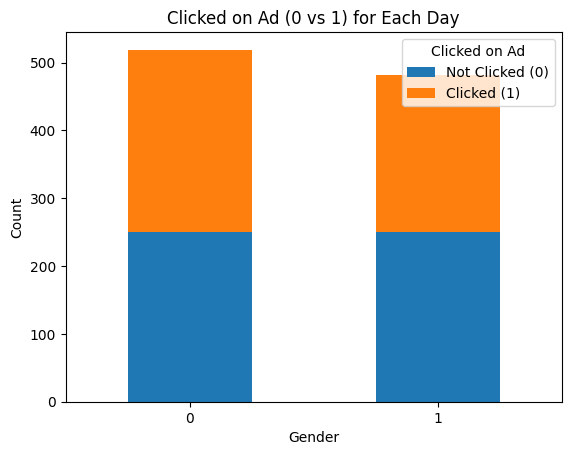

In [28]:
clicked_by_month = df.groupby(['Male', 'Clicked on Ad'])['Clicked on Ad'].count().unstack().fillna(0)

# Plot the data
plt.figure(figsize=(12, 6))
clicked_by_month.plot(kind='bar', stacked=True)
plt.title('Clicked on Ad (0 vs 1) for Each Day')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Clicked on Ad', labels=['Not Clicked (0)', 'Clicked (1)'])
plt.xticks(rotation=0)
plt.show()

In [29]:
#Overall females tend to click on a Ad more often than males.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


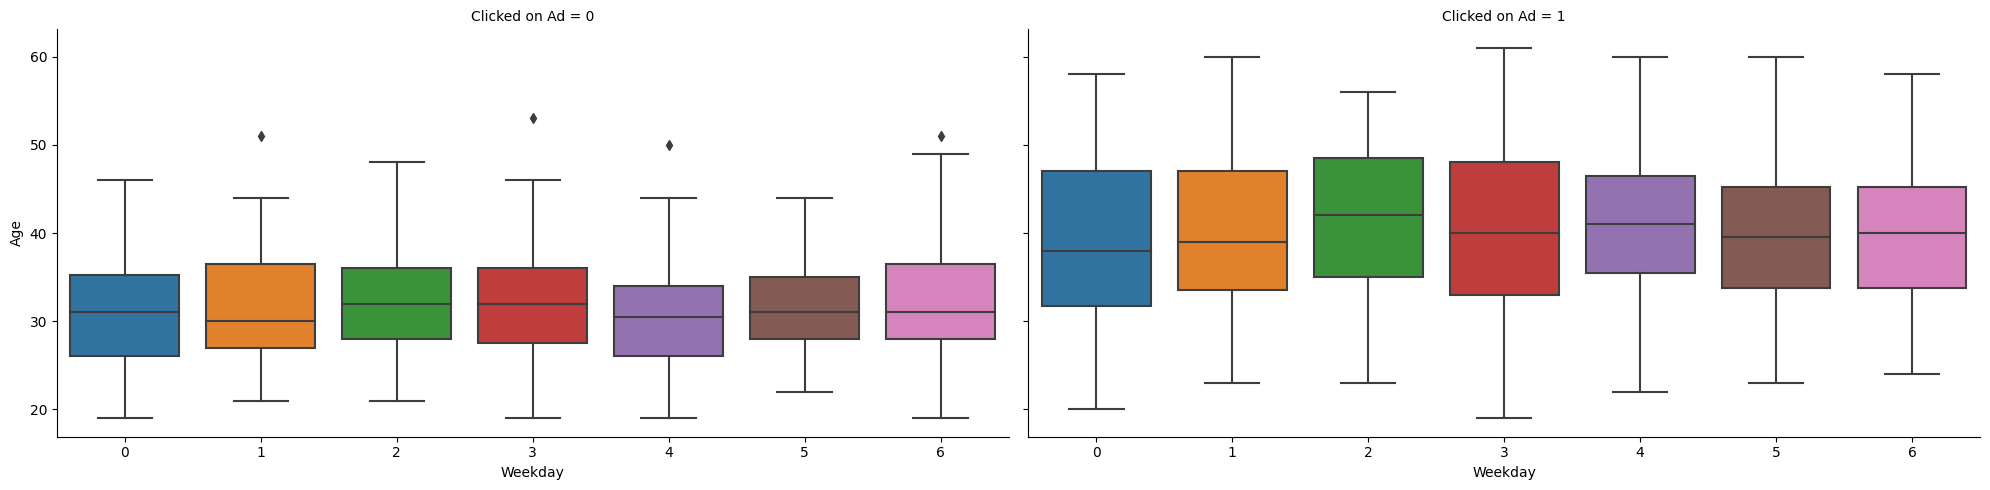

In [30]:
sns.catplot(x="Weekday", y="Age", col="Clicked on Ad", data=df, kind="box", height=5, aspect=2.0)
plt.show()

In [31]:
#Comparison of users who have clicked on ad or not in terms of age and weekday. 
#It is clear that people with higher age tend to click on a ad.

In [32]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,1,2,11,21,3
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,1,4,22,2,4
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1,2,1,17,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,0,3,24,2,3


In [33]:
new_df = df.copy()

In [34]:
# Dummy encoding on Month column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Month'], prefix='Month')], axis=1) 
# Dummy encoding on weekday column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Weekday'], prefix='Weekday')], axis=1)

In [35]:
# Ceating buckets for hour columns based on EDA part
new_df['Hour_bins'] = pd.cut(new_df['Hour'], bins = [0, 5, 11, 17, 23], 
                labels = ['Hour_0-5', 'Hour_6-11', 'Hour_12-17', 'Hour_18-23'], include_lowest= True)

In [36]:
# Dummy encoding on Hour_bins column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Hour_bins'], prefix='Hour')], axis=1)

/tmp/ipykernel_32/1841228199.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=new_df['Age'], y=df['Clicked on Ad'],ci=None)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, '19'),
  Text(1, 0, '20'),
  Text(2, 0, '21'),
  Text(3, 0, '22'),
  Text(4, 0, '23'),
  Text(5, 0, '24'),
  Text(6, 0, '25'),
  Text(7, 0, '26'),
  Text(8, 0, '27'),
  Text(9, 0, '28'),
  Text(10, 0, '29'),
  Text(11, 0, '30'),
  Text(12, 0, '31'),
  Text(13, 0, '32'),
  Text(14, 0, '33'),
  Text(15, 0, '34'),
  Text(16, 0, '35'),
  Text(17, 0, '36'),
  Text(18, 0, '37'),
  Text(19, 0, '38'),
  Text(20, 0, '39'),
  Text(21, 0, '40'),
  Text(22, 0, '41'),
  Text(23, 0, '42'),
  Text(24, 0, '43'),
  Text(25, 0, '44'),
  Text(26, 0, '45'),
  Text(27, 0, '46'),
  Text(28, 0, '47'),
  Text(29, 0, '48'),
  Text(30, 0, '49'),
  Text(31, 0, '50'),
  Text(32, 0, '51'),
  Text(33, 0, '52'),
  Text(34, 0, '53'),
  Text(35, 0, '54'),
  Text(36, 0, '55'),
  Text(37, 0, '56'),
  Text(38, 0, 

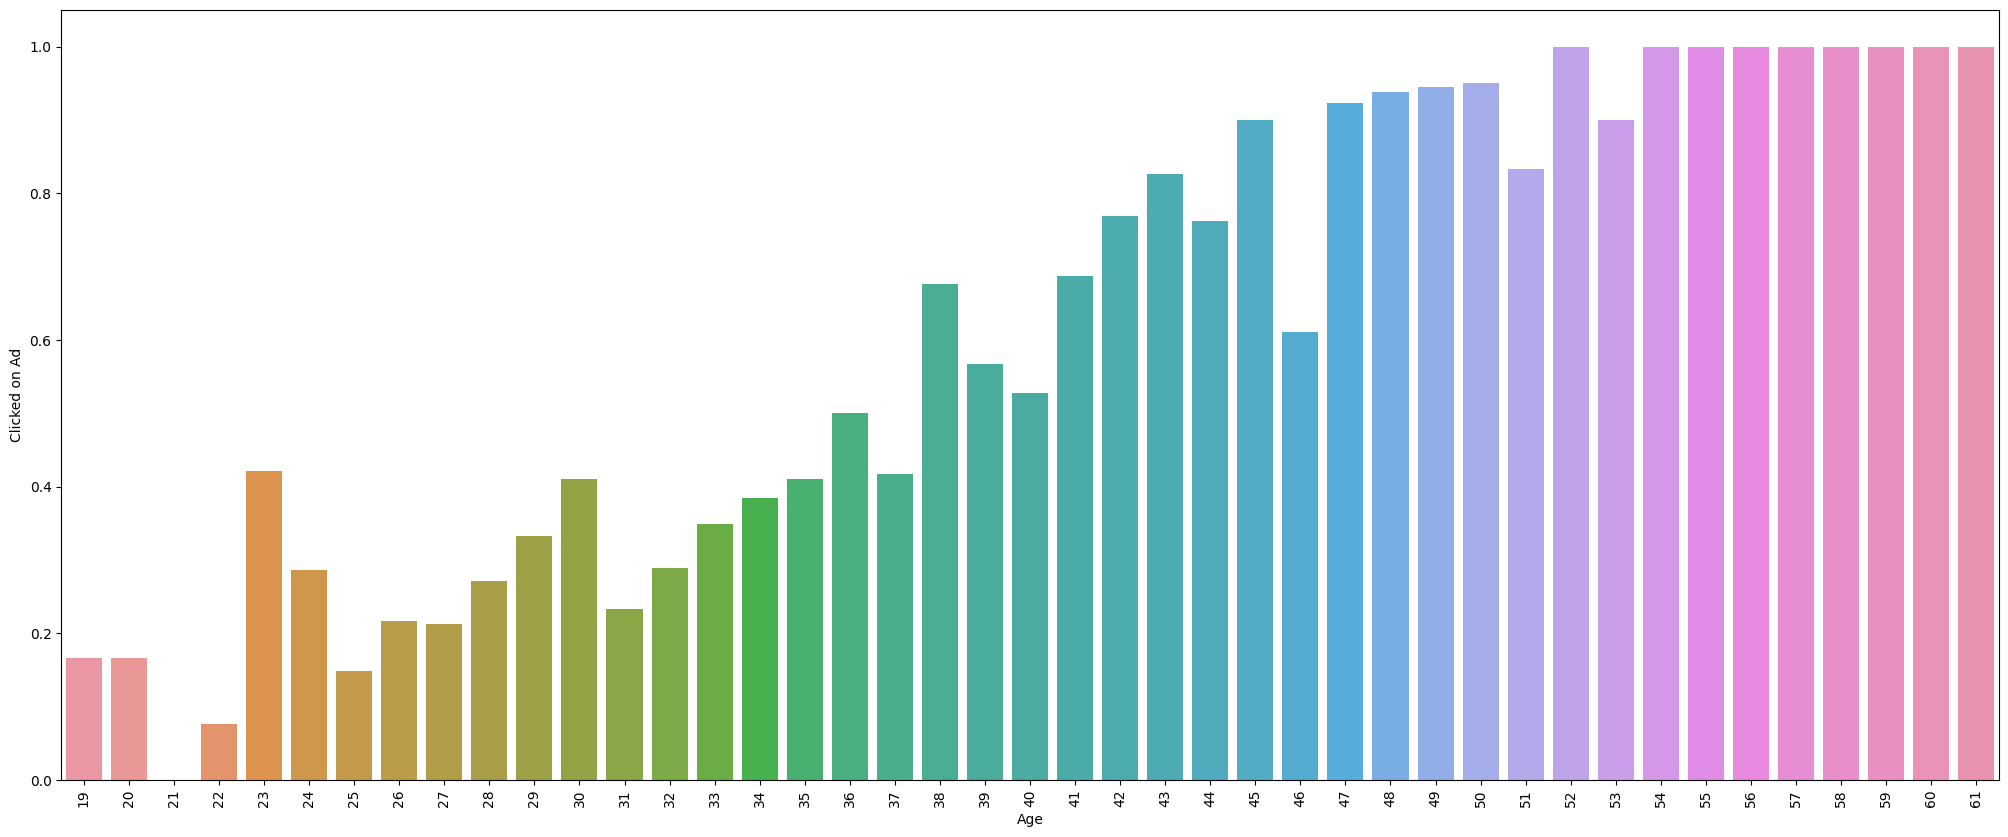

In [37]:
# Feature engineering on Age column
plt.figure(figsize=(25, 10))
sns.barplot(x=new_df['Age'], y=df['Clicked on Ad'],ci=None)
plt.xticks(rotation=90)


In [38]:
#Elder people tend to click on ads more often, then that's a valuable insight

In [39]:
new_df['Age_bins'] = pd.cut(new_df['Age'], bins=[0, 18, 30, 45, 70], labels=['Young','Adult','Mid', 'Elder'])

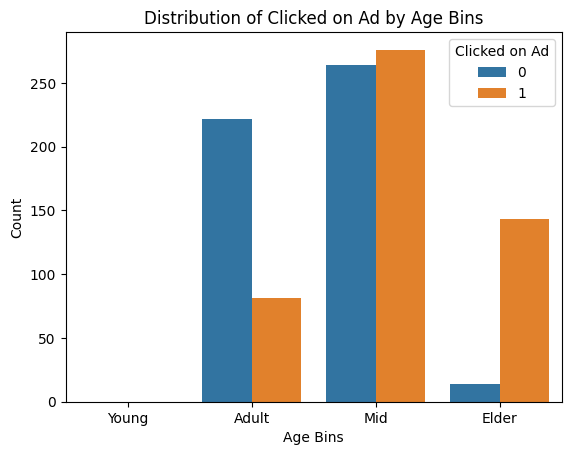

In [40]:
sns.countplot(x='Age_bins', hue='Clicked on Ad', data=new_df)

# Adding labels and a title to the plot
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.title('Distribution of Clicked on Ad by Age Bins')

# Display the plot
plt.show()


In [41]:
# Dummy encoding on Age column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Age_bins'], prefix='Age')], axis=1) 

In [42]:
# Dummy encoding on Column column based on EDA
new_df = pd.concat([new_df, pd.get_dummies(new_df['Country'], prefix='Country')], axis=1)

In [43]:
# Remove redundant and no predictive power features
new_df.drop(['Country', 'Ad Topic Line', 'City', 'Day', 'Month', 'Weekday', 
             'Hour', 'Hour_bins', 'Age', 'Age_bins'], axis = 1, inplace = True)
new_df.head() # Checking the final dataframe


,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month_1,Month_2,Month_3,Month_4,Month_5,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,61833.90,256.09,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,80.23,68441.85,193.77,1,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,69.47,59785.94,236.50,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,74.15,54806.18,245.89,1,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,68.37,73889.99,225.58,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
X = new_df.drop(['Clicked on Ad'],axis=1)
y = new_df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [45]:
# Standarizing the features
from  sklearn.preprocessing  import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 263) (800,)
(200, 263) (200,)


In [46]:
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
    # Add more classifiers as needed
]


In [47]:
for clf_name, clf in classifiers:
    # Fit the classifier on the training data
    clf.fit(X_train_std, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test_std)
    
    # Calculate accuracy (you can use other metrics as well)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the accuracy for each classifier
    print(f'{clf_name}: Accuracy = {accuracy:.2f}')

Logistic Regression: Accuracy = 0.91
Decision Tree: Accuracy = 0.92
Random Forest: Accuracy = 0.94
K-Nearest Neighbors: Accuracy = 0.66
Support Vector Machine: Accuracy = 0.80
Naive Bayes: Accuracy = 0.49
AdaBoost: Accuracy = 0.94
Gradient Boosting: Accuracy = 0.93


In [48]:
#Create and fit the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_std, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test_std)

In [49]:
X_test_df = pd.DataFrame(X_test_std, columns=X.columns)

# Add the predicted values (y_pred_rf) as a new column
X_test_df['Predicted_Clicked_on_Ad'] = y_pred_rf

# Optionally, you can also add the actual values (y_test) for comparison
X_test_df['Actual_Clicked_on_Ad'] = y_test.values

# Display the resulting DataFrame
X_test_df.head()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,...,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Predicted_Clicked_on_Ad,Actual_Clicked_on_Ad
0,-0.120676,-0.020443,-1.394672,1.046060,-0.418023,-0.438464,2.346074,-0.411814,-0.424195,-0.397168,...,-0.086929,-0.086929,-0.061352,-0.061352,-0.086929,-0.035377,-0.070888,-0.070888,1,1
1,0.380382,-1.012210,-1.346039,-0.955968,2.392214,-0.438464,-0.426244,-0.411814,-0.424195,-0.397168,...,-0.086929,-0.086929,-0.061352,-0.061352,-0.086929,-0.035377,-0.070888,-0.070888,1,1
2,-1.354773,0.500612,-1.056977,1.046060,-0.418023,-0.438464,-0.426244,-0.411814,2.357409,-0.397168,...,-0.086929,-0.086929,-0.061352,-0.061352,-0.086929,-0.035377,-0.070888,-0.070888,1,1
3,-1.454733,0.916715,0.012962,-0.955968,-0.418023,2.280691,-0.426244,-0.411814,-0.424195,-0.397168,...,-0.086929,-0.086929,-0.061352,-0.061352,-0.086929,-0.035377,-0.070888,-0.070888,1,1
4,0.848748,0.834683,0.605241,-0.955968,2.392214,-0.438464,-0.426244,-0.411814,-0.424195,-0.397168,...,-0.086929,-0.086929,-0.061352,-0.061352,-0.086929,-0.035377,-0.070888,-0.070888,0,0
